In [1]:
# 2.1.1 数据特征类型
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 读取数据
path = './dataset/'
train = pd.read_csv(path + 'security_train.csv')
test = pd.read_csv(path + 'security_test.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89806693 entries, 0 to 89806692
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   file_id  int64 
 1   label    int64 
 2   api      object
 3   tid      int64 
 4   index    int64 
dtypes: int64(4), object(1)
memory usage: 3.3+ GB


In [3]:
train.head()

,file_id,label,api,tid,index
0,1,5,LdrLoadDll,2488,0
1,1,5,LdrGetProcedureAddress,2488,1
2,1,5,LdrGetProcedureAddress,2488,2
3,1,5,LdrGetProcedureAddress,2488,3
4,1,5,LdrGetProcedureAddress,2488,4


In [4]:
train.describe()

,file_id,label,tid,index
count,8.980669e+07,8.980669e+07,8.980669e+07,8.980669e+07
mean,7.078770e+03,3.862835e+00,2.533028e+03,1.547521e+03
std,3.998794e+03,2.393783e+00,6.995798e+02,1.412249e+03
min,1.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00
25%,3.637000e+03,2.000000e+00,2.356000e+03,3.490000e+02
50%,7.161000e+03,5.000000e+00,2.564000e+03,1.085000e+03
75%,1.055100e+04,5.000000e+00,2.776000e+03,2.503000e+03
max,1.388700e+04,7.000000e+00,2.089600e+04,5.000000e+03


<AxesSubplot:xlabel='tid'>

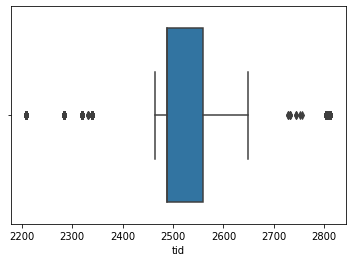

In [5]:
sns.boxplot(x=train.iloc[:10000]['tid'])

In [6]:
train.nunique()

file_id    13887
label          8
api          295
tid         2782
index       5001
dtype: int64

In [7]:
# 缺失值
train.isnull().sum()

file_id    0
label      0
api        0
tid        0
index      0
dtype: int64

In [8]:
# 异常值
train['index'].describe()

count    8.980669e+07
mean     1.547521e+03
std      1.412249e+03
min      0.000000e+00
25%      3.490000e+02
50%      1.085000e+03
75%      2.503000e+03
max      5.000000e+03
Name: index, dtype: float64

In [9]:
train['tid'].describe()

count    8.980669e+07
mean     2.533028e+03
std      6.995798e+02
min      1.000000e+02
25%      2.356000e+03
50%      2.564000e+03
75%      2.776000e+03
max      2.089600e+04
Name: tid, dtype: float64

In [10]:
# 2.1.5 标签分布
train['label'].value_counts()

5    33033543
0    16375107
7    15081535
2     9693969
3     8117585
6     4586578
1     2254561
4      663815
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

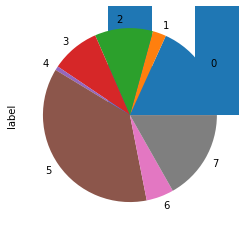

In [12]:
# 直观化标签分布
train['label'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:ylabel='label'>

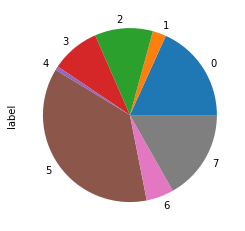

In [13]:
train['label'].value_counts().sort_index().plot(kind='pie')

In [14]:
# 2.2 测试集数据探索
# 2.2.1 数据信息
test.head()

,file_id,api,tid,index
0,1,RegOpenKeyExA,2332,0
1,1,CopyFileA,2332,1
2,1,OpenSCManagerA,2332,2
3,1,CreateServiceA,2332,3
4,1,RegOpenKeyExA,2468,0


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79288375 entries, 0 to 79288374
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   file_id  int64 
 1   api      object
 2   tid      int64 
 3   index    int64 
dtypes: int64(3), object(1)
memory usage: 2.4+ GB


In [16]:
# 2.2.2 缺失值
test.isnull().sum()

file_id    0
api        0
tid        0
index      0
dtype: int64

In [17]:
# 2.2.3 数据分布
test.nunique()

file_id    12955
api          298
tid         2047
index       5001
dtype: int64

In [18]:
# 2.2.4 异常值
test['index'].describe()

count    7.928838e+07
mean     1.584815e+03
std      1.411116e+03
min      0.000000e+00
25%      3.900000e+02
50%      1.131000e+03
75%      2.547000e+03
max      5.000000e+03
Name: index, dtype: float64

In [19]:
test['tid'].describe()

count    7.928838e+07
mean     2.491914e+03
std      5.824600e+02
min      1.000000e+02
25%      2.360000e+03
50%      2.556000e+03
75%      2.752000e+03
max      9.196000e+03
Name: tid, dtype: float64

In [21]:
# 2.3
# 2.3.1 file_id分析
train_fileids = train['file_id'].unique()
test_fileids = test['file_id'].unique()
len(set(train_fileids) - set(test_fileids))

932

In [22]:
len(set(test_fileids) - set(train_fileids))

0

In [23]:
# 2.3.2 API分析
train_apis = train['api'].unique()
test_apis = test['api'].unique()
set(test_apis) - set(train_apis)

{'CreateDirectoryExW',
 'InternetGetConnectedStateExA',
 'MessageBoxTimeoutW',
 'NtCreateUserProcess',
 'NtDeleteFile',
 'TaskDialog'}

In [24]:
set(train_apis) - set(test_apis)

{'EncryptMessage', 'RtlCompressBuffer', 'WSASendTo'}